# 1-Import All the Necessary Libraries

In [43]:
import pandas as pd
from matplotlib import pyplot as plt 
import seaborn as sns 
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_absolute_error,r2_score

# 2-Import The data

In [2]:
cars_df=pd.read_csv("Cars.csv")

In [3]:
cars_df

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
76,322,36.900000,50,169.598513,16.132947
77,238,19.197888,115,150.576579,37.923113
78,263,34.000000,50,151.598513,15.769625
79,295,19.833733,119,167.944460,39.423099


# 3  Data Understanding 

In [4]:
cars_df.shape

(81, 5)

In [6]:
cars_df.isna().sum()

HP     0
MPG    0
VOL    0
SP     0
WT     0
dtype: int64

In [7]:
cars_df.dtypes

HP       int64
MPG    float64
VOL      int64
SP     float64
WT     float64
dtype: object

In [8]:
cars_df.describe()

,HP,MPG,VOL,SP,WT
count,81.000000,81.000000,81.000000,81.000000,81.000000
mean,117.469136,34.422076,98.765432,121.540272,32.412577
std,57.113502,9.131445,22.301497,14.181432,7.492813
min,49.000000,12.101263,50.000000,99.564907,15.712859
25%,84.000000,27.856252,89.000000,113.829145,29.591768
50%,100.000000,35.152727,101.000000,118.208698,32.734518
75%,140.000000,39.531633,113.000000,126.404312,37.392524
max,322.000000,53.700681,160.000000,169.598513,52.997752


C:\Users\Nasir\AppData\Local\Temp\ipykernel_11404\441262243.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cars_df["MPG"])


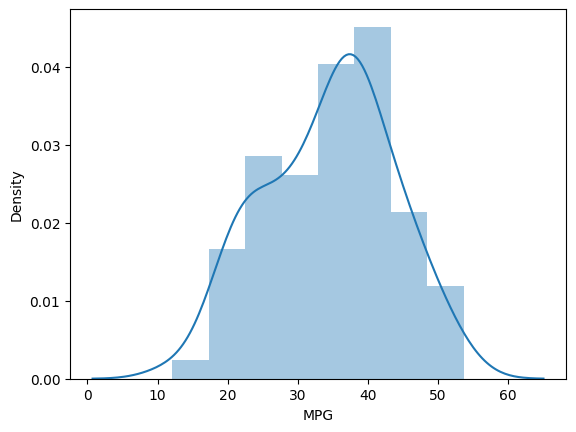

In [11]:
sns.distplot(cars_df["MPG"])
plt.show()

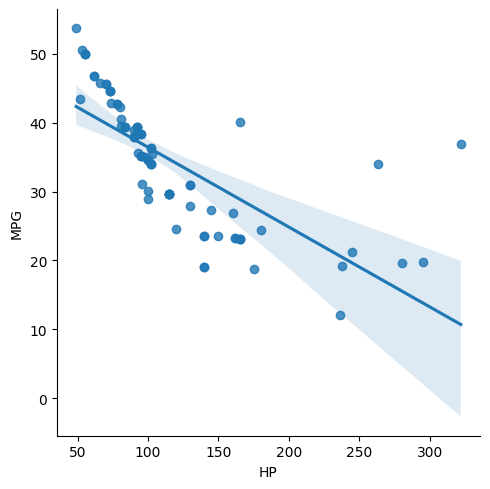

In [12]:
sns.lmplot(data=cars_df,x="HP",y='MPG')

# 4 Assumption Check

In [13]:
for i in cars_df.columns:
    print(i)

HP
MPG
VOL
SP
WT


# Assumption_1 Linearity Test

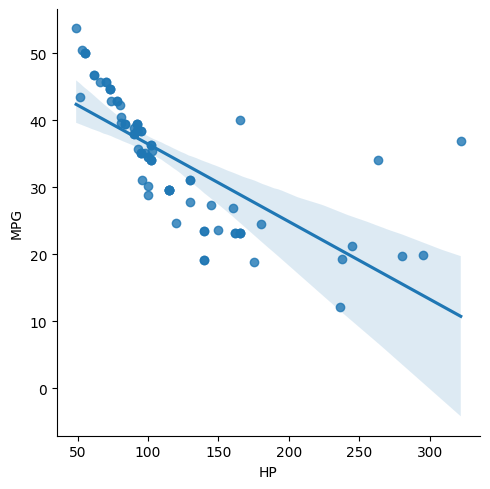

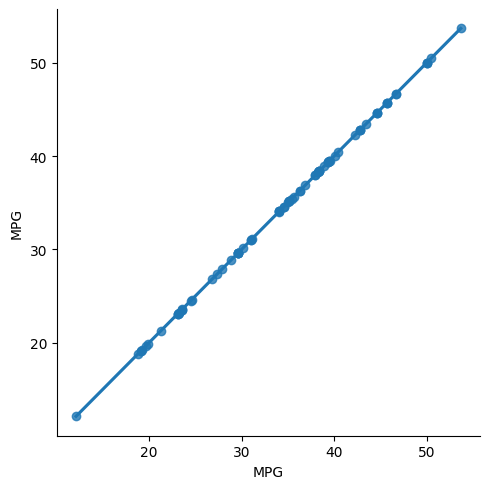

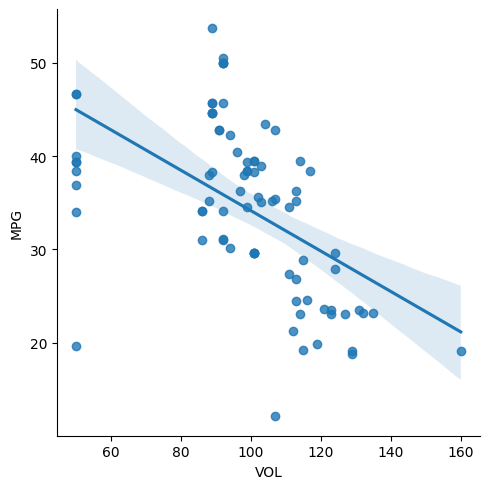

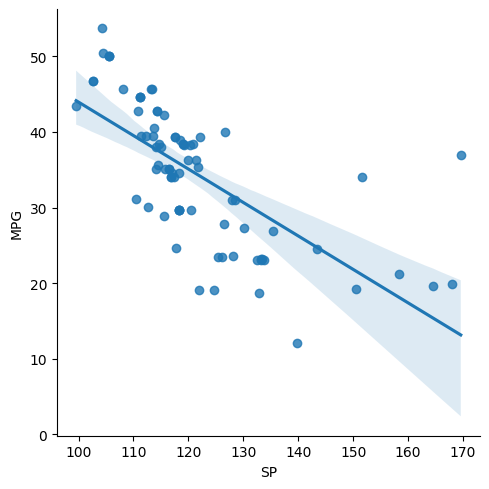

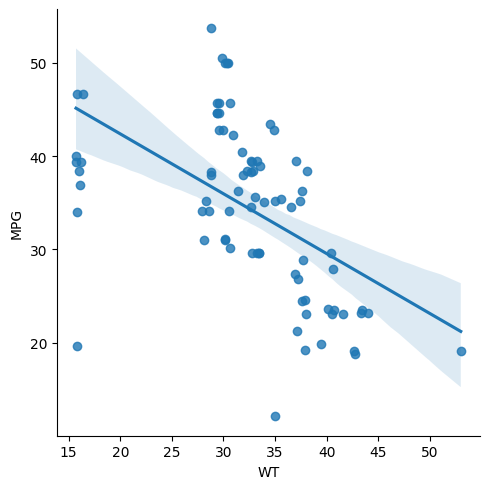

In [14]:
for i in cars_df.columns:
    sns.lmplot(data=cars_df,x=i,y='MPG')
    

# Linearity test Failed

# Assumption_2 No MultiCollinearity

In [16]:
cars_df.corr()

,HP,MPG,VOL,SP,WT
HP,1.000000,-0.725038,0.077459,0.973848,0.076513
MPG,-0.725038,1.000000,-0.529057,-0.687125,-0.526759
VOL,0.077459,-0.529057,1.000000,0.102170,0.999203
SP,0.973848,-0.687125,0.102170,1.000000,0.102439
WT,0.076513,-0.526759,0.999203,0.102439,1.000000


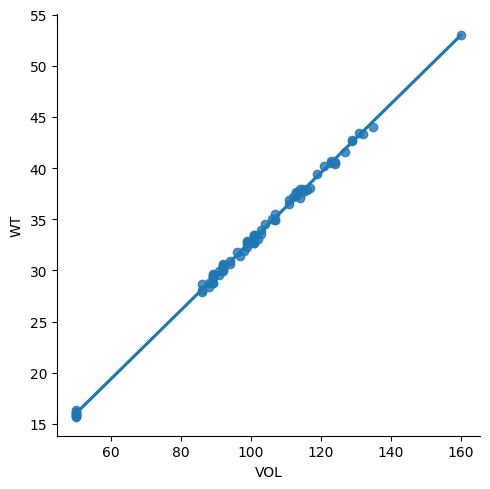

In [17]:
sns.lmplot(data=cars_df,x='VOL',y='WT')

<Axes: >

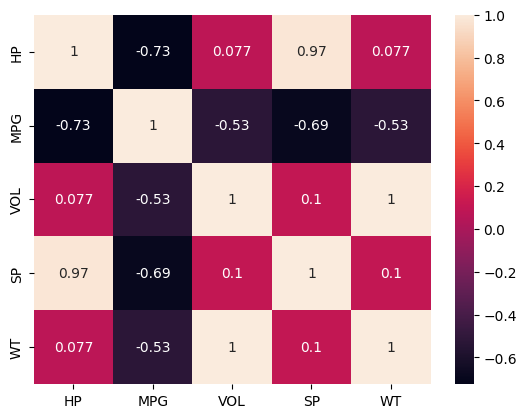

In [19]:
sns.heatmap(cars_df.corr(),annot=True)

## MultiCollinearity test failed

In [20]:
cars_df

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
76,322,36.900000,50,169.598513,16.132947
77,238,19.197888,115,150.576579,37.923113
78,263,34.000000,50,151.598513,15.769625
79,295,19.833733,119,167.944460,39.423099


# Assumption_3 No AutoRegression  Passed

# 5 Data Prepration

In [25]:
cars_df

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
76,322,36.900000,50,169.598513,16.132947
77,238,19.197888,115,150.576579,37.923113
78,263,34.000000,50,151.598513,15.769625
79,295,19.833733,119,167.944460,39.423099


In [26]:
x=cars_df.drop(labels="MPG",axis=1)

In [27]:
x

,HP,VOL,SP,WT
0,49,89,104.185353,28.762059
1,55,92,105.461264,30.466833
2,55,92,105.461264,30.193597
3,70,92,113.461264,30.632114
4,53,92,104.461264,29.889149
...,...,...,...,...
76,322,50,169.598513,16.132947
77,238,115,150.576579,37.923113
78,263,50,151.598513,15.769625
79,295,119,167.944460,39.423099


In [46]:
y=cars_df["MPG"]

In [47]:
y

0     53.700681
1     50.013401
2     50.013401
3     45.696322
4     50.504232
        ...    
76    36.900000
77    19.197888
78    34.000000
79    19.833733
80    12.101263
Name: MPG, Length: 81, dtype: float64

# 6 Model Building

In [48]:
model=LinearRegression()

# 7 Model Training   

In [49]:
model.fit(x,y)

LinearRegression()

In [50]:
model.intercept_

30.67733585215165

In [51]:
model.coef_

array([-0.20544372, -0.33605084,  0.39562692,  0.40057409])

# 8 Model Testing   

In [52]:
y_pred=model.predict(x)

In [53]:
cars_df["MPG"]

0     53.700681
1     50.013401
2     50.013401
3     45.696322
4     50.504232
        ...    
76    36.900000
77    19.197888
78    34.000000
79    19.833733
80    12.101263
Name: MPG, Length: 81, dtype: float64

In [54]:
y_pred

array([43.44193477, 42.38879289, 42.27934147, 42.53835981, 42.17264802,
       43.02061916, 42.32536062, 48.07621852, 48.28120247, 40.79122814,
       41.52153227, 47.80956747, 39.95980269, 41.52757889, 41.76632332,
       41.6181448 , 41.15094046, 47.98605515, 41.30861046, 37.87127922,
       38.57706414, 37.35199705, 37.89770285, 39.5625144 , 39.93380662,
       46.73870908, 35.48165898, 38.78152504, 38.24861192, 36.00285298,
       34.84603989, 37.21630246, 37.13919796, 34.82541399, 37.22361389,
       37.53950097, 39.27144845, 38.24219888, 38.54286458, 35.9391722 ,
       34.2129755 , 35.36313259, 37.50473376, 38.07998482, 35.79651664,
       36.2613377 , 34.21826465, 35.59393404, 36.91805291, 33.31108154,
       33.21313413, 33.3023649 , 29.19864884, 27.52358579, 28.3207133 ,
       28.56722621, 35.81583602, 33.02108459, 35.37334971, 32.29909503,
       29.87685849, 28.76093817, 25.14188416, 26.47040896, 25.97651933,
       36.35652478, 26.0975912 , 23.6416178 , 24.39887199, 20.21

In [55]:
mean_absolute_error(cars_df["MPG"],y_pred)

3.267968285420799

In [56]:
r2_score(cars_df["MPG"],y_pred)

0.7705372737359844

# Assumption_4 Homoscadasticity 

In [57]:
error=y-y_pred

In [58]:
error

0     10.258747
1      7.624608
2      7.734060
3      3.157963
4      8.331584
        ...    
76    15.617904
77     1.298838
78     7.863547
79     7.517122
80    -3.458218
Name: MPG, Length: 81, dtype: float64

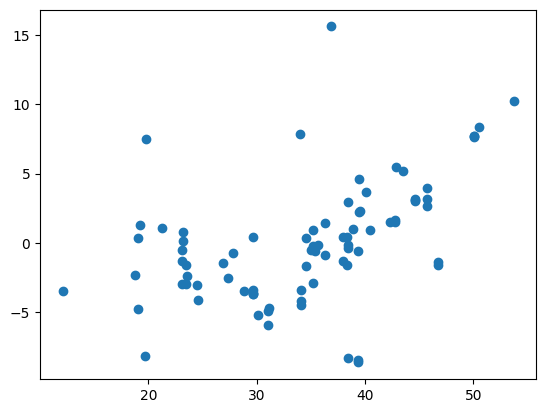

In [59]:
plt.scatter(x=cars_df['MPG'],y=error)

##  Homoscadasticity Failed

# Assumption_5 Zero Residual Mean 

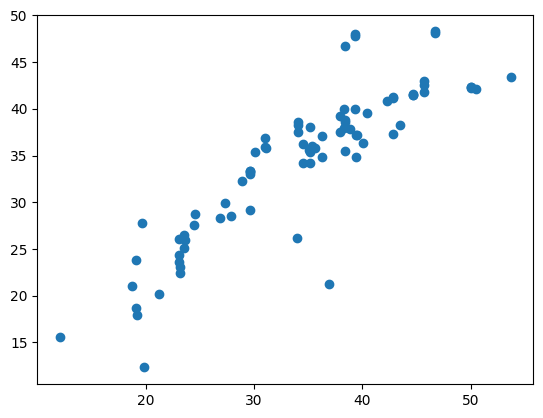

In [63]:
plt.scatter(x=y,y=y_pred)

##  Zero Residual Mean Failed